Name :- Naresh Biradar

ID :- 10081

# Problem Statement

 Yulu, a leading micro-mobility service provider in India, aims to understand the factors affecting the demand for shared electric cycles in the Indian market. This analysis will help identify significant variables influencing electric cycle demand.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy

In [3]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Observation** :- There is no null value in the dataset.

In [7]:
df.duplicated().sum()

0

**Observation** :- There is no duplicated value in the dataset.

In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Observation:-**
1. Mean temperature is 20.23 degree celsius and max temperature is 41 and min temperature is 0.82 degree celsius.
2. Mean windspeed is 12.79 and max windspeed is 56.99 and min windspeed is 0.


# Column Profiling:-

Column Profiling:
datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not
workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

In [18]:
df.shape

(10886, 13)

The dataset contains the date for 10886 hours

In [58]:
df.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float32
atemp          float32
humidity          int8
windspeed      float32
casual           int16
registered       int16
count            int16
dtype: object

**Converting the datatype of datetime column from object to datetime**


In [60]:
df['datetime'] = pd.to_datetime(df['datetime'])


**Time period for which the data is given**

In [12]:
df['datetime'].min()


Timestamp('2011-01-01 00:00:00')

In [13]:
df['datetime'].max()


Timestamp('2012-12-19 23:00:00')

In [14]:
df['datetime'].max() - df['datetime'].min()


Timedelta('718 days 23:00:00')

In [61]:
df['day'] = df['datetime'].dt.day_name()


In [16]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday


In [23]:
df.set_index('datetime', inplace = True)

**Analysing count of rental bikes by time**

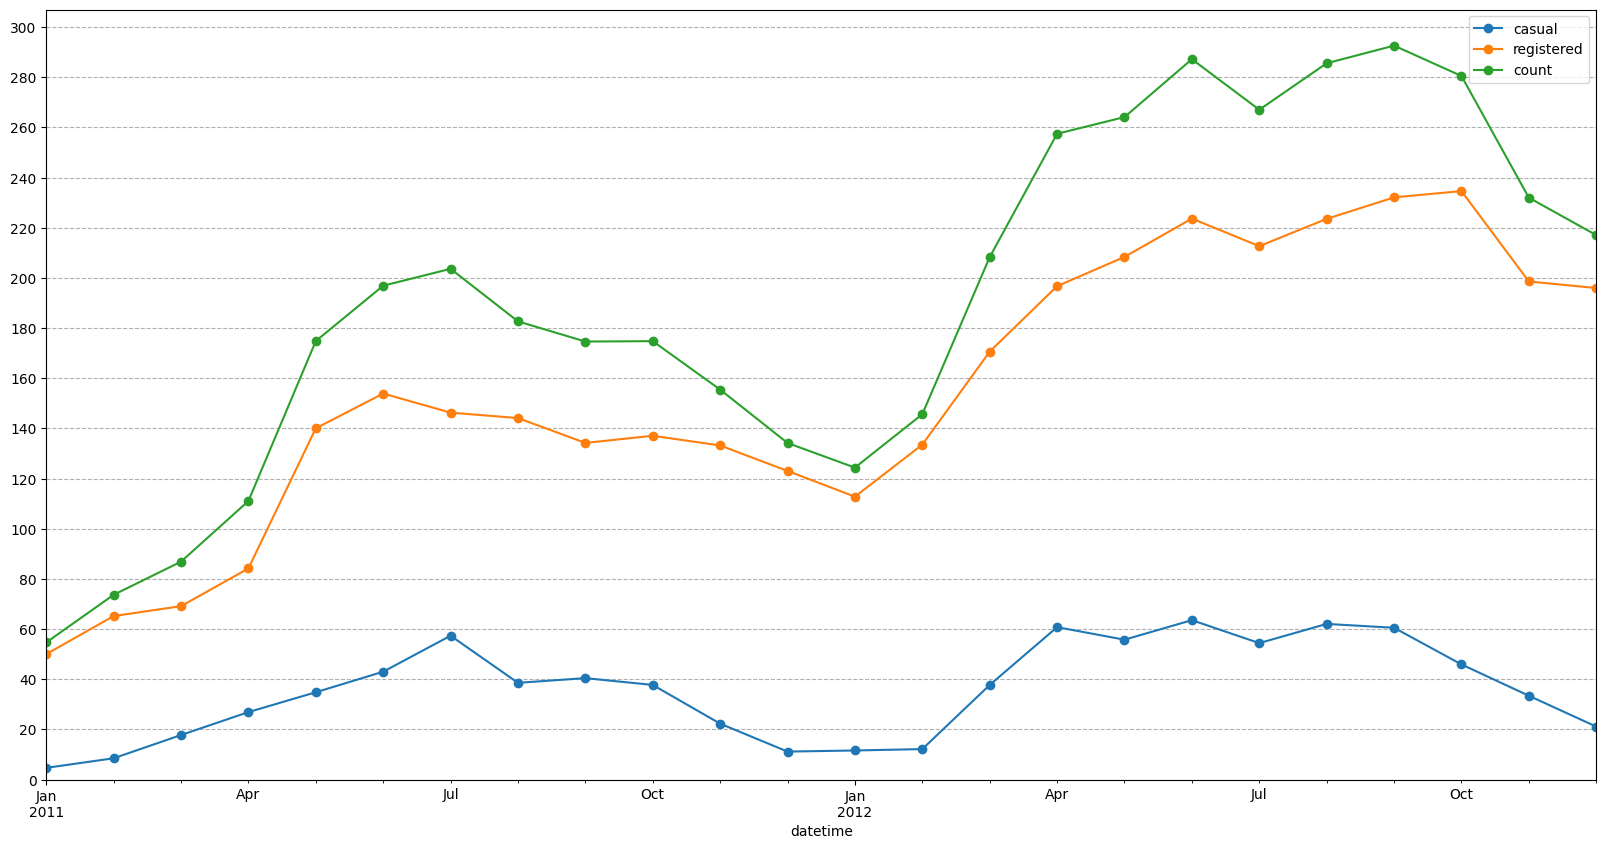

In [25]:
plt.figure(figsize = (20, 10))


df.resample('M')['casual'].mean().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].mean().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].mean().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,)
plt.show()


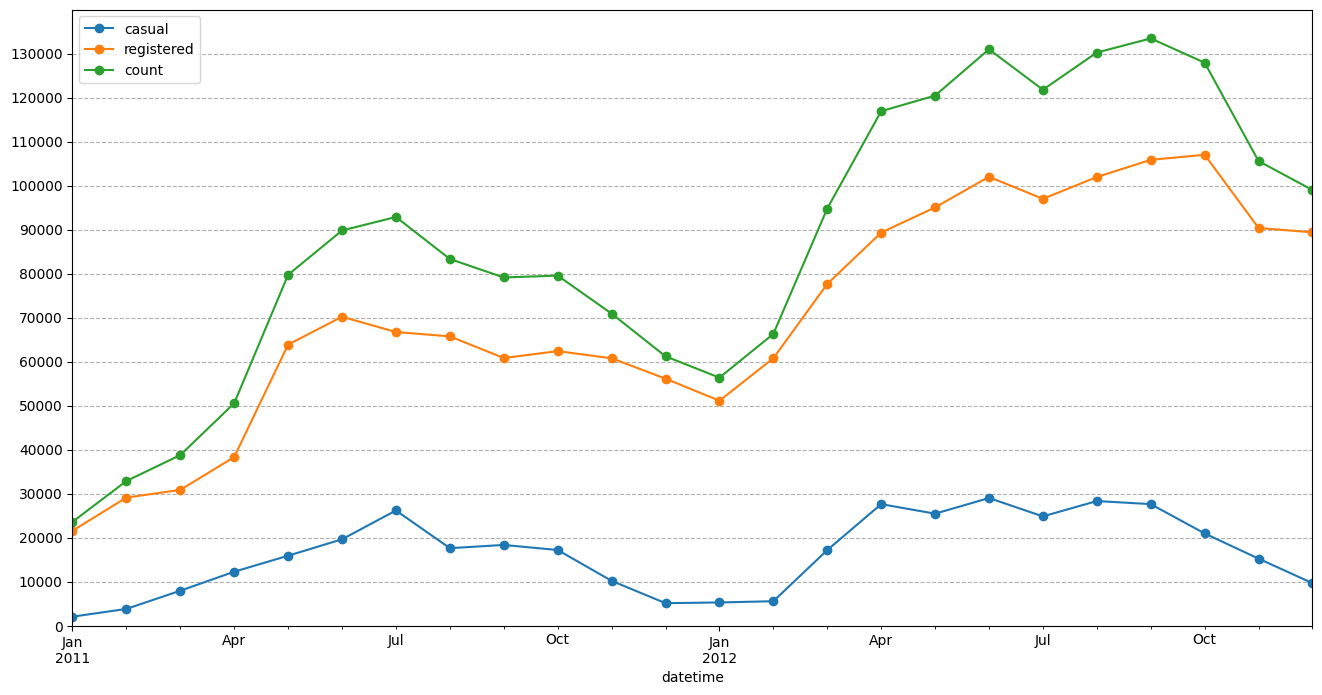

In [27]:
plt.figure(figsize = (16, 8))


df.resample('M')['casual'].sum().plot(kind = 'line', legend = 'casual', marker = 'o')
df.resample('M')['registered'].sum().plot(kind = 'line', legend = 'registered', marker = 'o')
df.resample('M')['count'].sum().plot(kind = 'line', legend = 'count', marker = 'o')

plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 130001, 10000))
plt.ylim(0,)
plt.show()

**Checking if there is an increase in the average hourly count of rental bikes from the year 2011 to 2012**

In [28]:
# resampling the DataFrame by the year
df1 = df.resample('Y')['count'].mean().to_frame().reset_index()

# Create a new column 'prev_count' by shifting the 'count' column one position up
    # to compare the previous year's count with the current year's count
df1['prev_count'] = df1['count'].shift(1)

# Calculating the growth percentage of 'count' with respect to the 'count' of previous year
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1

,datetime,count,prev_count,growth_percent
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,238.560944,144.223349,65.410764


This data indicates a notable increase in the count of the variable throughout a year. The average total hourly count of rental bikes is 144 for 2011 and 239 for 2012, showing a significant annual growth rate of 65.41%. This surge in demand for electric vehicles on an hourly basis suggests optimistic growth and potentially a favorable trend or rising interest in the measured variable.

In [29]:
df.reset_index(inplace = True)

#### Average hourly count of rental bikes for different month.

In [30]:
# Grouping the DataFrame by the month
df1 = df.groupby(by = df['datetime'].dt.month)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'month'}, inplace = True)

# Create a new column 'prev_count' by shifting the 'count' column one position up
    # to compare the previous month's count with the current month's count
df1['prev_count'] = df1['count'].shift(1)

# Calculating the growth percentage of 'count' with respect to the 'count' of previous month
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('month', inplace = True)
df1

,count,prev_count,growth_percent
month,,,
1,90.366516,NaN,NaN
2,110.003330,90.366516,21.730188
3,148.169811,110.003330,34.695751
4,184.160616,148.169811,24.290241
5,219.459430,184.160616,19.167406
6,242.031798,219.459430,10.285440
7,235.325658,242.031798,-2.770768
8,234.118421,235.325658,-0.513007
9,233.805281,234.118421,-0.133753


The number of rental bikes goes up from January to March, with a big jump of 34.70% from February to March.

The increase slows down from April to June.

From July to September, there's a small decrease in bike rentals, with negative growth rates.

And from October to December, the number of rentals goes down more, with the biggest drop between October and November being -14.94%.

[]

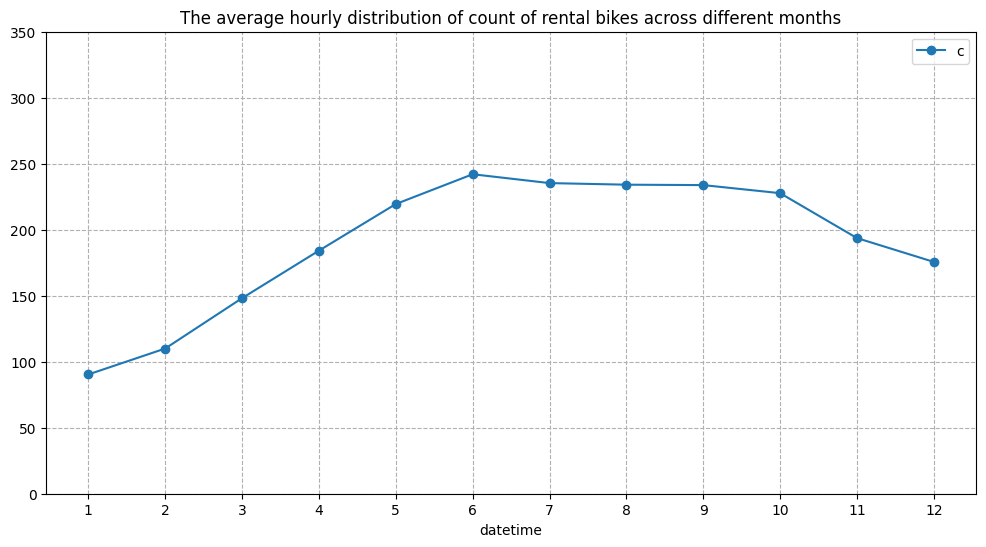

In [31]:
# The resulting plot visualizes the average hourly distribution of the count of rental bikes for each
    # month, allowing for comparison and identification of any patterns or trends throughout the year.

# Setting the figure size for the plot
plt.figure(figsize = (12, 6))

# Setting the title for the plot
plt.title("The average hourly distribution of count of rental bikes across different months")

# Grouping the DataFrame by the month and calculating the mean of the 'count' column for each month.
    # Ploting the line graph using markers ('o') to represent the average count per month.
df.groupby(by = df['datetime'].dt.month)['count'].mean().plot(kind = 'line', marker = 'o')

plt.ylim(0,)    # Setting the y-axis limits to start from zero
plt.xticks(np.arange(1, 13))   # Setting the x-ticks to represent the months from 1 to 12
plt.legend('count')    # Adding a legend to the plot for the 'count' line.
plt.yticks(np.arange(0, 400, 50))
# Adding gridlines to both the x and y axes with a dashed line style
plt.grid(axis = 'both', linestyle = '--')
plt.plot()     # Displaing the plot.

The average hourly bike rental count peaks in June, with July and August close behind.
Conversely, January sees the lowest average count, followed by February and March.
These trends imply a seasonal cycle in bike rental demand, with peaks in spring and summer, a slight dip in autumn, and a sharper decline in winter. Recognizing these patterns could aid the bike rental company in resource management, marketing tactics, and operational strategies year-round.








#### Distribution of average count of rental bikes on an hourly basis in a single day

In [32]:
# Grouping the DataFrame by the hour
df1 = df.groupby(by = df['datetime'].dt.hour)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'hour'}, inplace = True)

# Create a new column 'prev_count' by shifting the 'count' column one position up
    # to compare the previous hour's count with the current hour's count
df1['prev_count'] = df1['count'].shift(1)

# Calculating the growth percentage of 'count' with respect to the 'count' of previous hour
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('hour', inplace = True)
df1

,count,prev_count,growth_percent
hour,,,
0,55.138462,NaN,NaN
1,33.859031,55.138462,-38.592718
2,22.899554,33.859031,-32.367959
3,11.757506,22.899554,-48.656179
4,6.407240,11.757506,-45.505110
5,19.767699,6.407240,208.521293
6,76.259341,19.767699,285.777526
7,213.116484,76.259341,179.462793
8,362.769231,213.116484,70.221104


During the early morning hours (hours 0 to 5), there's a notable drop in the count, with negative growth percentages ranging from -38.59% to -48.66%.

However, starting at hour 5, there's a sudden increase in count, with a steep positive growth percentage of 208.52% observed from hour 4 to hour 5.

The count keeps rising significantly until it peaks at hour 17, with a growth percentage of 48.17% compared to the previous hour.

After hour 17, there's a gradual decline in count, with negative growth percentages ranging from -8.08% to -32.99% during the late evening and nighttime hours.

[]

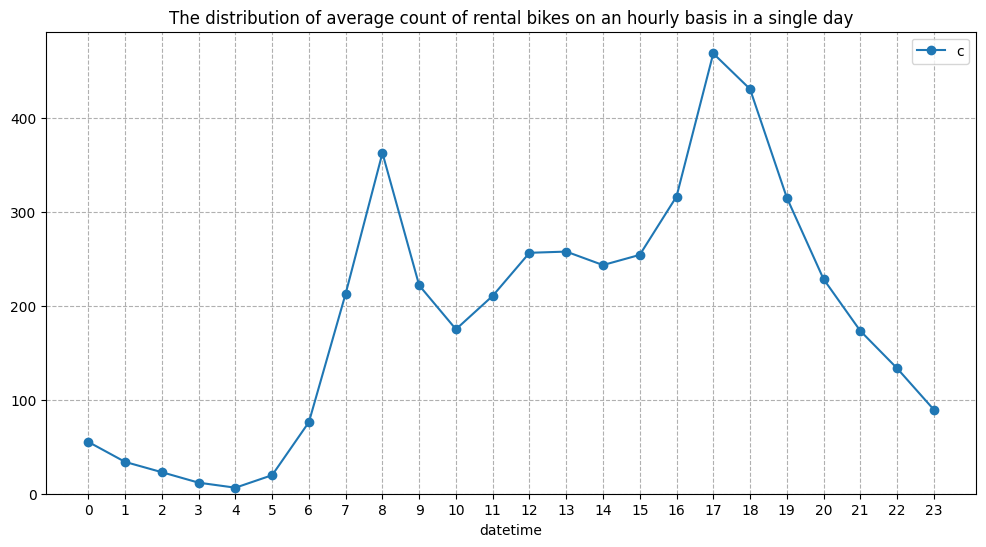

In [33]:
plt.figure(figsize = (12, 6))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
df.groupby(by = df['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.legend('count')
plt.grid(axis = 'both', linestyle = '--')
plt.plot()

The peak average count of rental bikes occurs around 5 PM, with notable peaks also at 6 PM and 8 AM.

Conversely, the lowest average counts are typically observed at 4 AM, with slight increases at 3 AM and 5 AM.

These trends highlight clear fluctuations throughout the day, with lower counts in the early morning, a surge in the morning, a peak in the afternoon, and a gradual decrease in the evening and nighttime.

In [35]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday


In [90]:
# 1: spring, 2: summer, 3: fall, 4: winter
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['season'].apply(season_category)

### Updating data types of columns to optimize memory usage

##### Updating dtype of season column

In [46]:
print('Memory usage of season column : ', df['season'].memory_usage())
# Since the dtype of season column is object, we can convert the dtype to category to save memory
df['season'] = df['season'].astype('category')
print('Updated Memory usage of season column : ', df['season'].memory_usage())

Memory usage of season column :  87216
Updated Memory usage of season column :  11218


##### Updating dtype of holiday column

In [47]:
print('Max value entry in holiday column : ', df['holiday'].max())
print('Memory usage of holiday column : ', df['holiday'].memory_usage())
# Since the maximum entry in holiday column is 1 and the dtype is int64, we can convert the dtype to category to save memory
df['holiday'] = df['holiday'].astype('category')
print('Updated Memory usage of holiday column : ', df['holiday'].memory_usage())

Max value entry in holiday column :  1
Memory usage of holiday column :  87216
Updated Memory usage of holiday column :  11138


#### Updating dtype of workingday column

In [48]:
print('Max value entry in workingday column : ', df['workingday'].max())
print('Memory usage of workingday column : ', df['workingday'].memory_usage())
# Since the maximum entry in workingday column is 1 and the dtype is int64, we can convert the dtype to category to save memory
df['workingday'] = df['workingday'].astype('category')
print('Updated Memory usage of workingday column : ', df['workingday'].memory_usage())

Max value entry in workingday column :  1
Memory usage of workingday column :  87216
Updated Memory usage of workingday column :  11138


#### Updating dtype of weather column

In [49]:
print('Max value entry in weather column : ', df['weather'].max())
print('Memory usage of weather column : ', df['weather'].memory_usage())
# Since the maximum entry in weather column is 4 and the dtype is int64, we can convert the dtype to category to save memory
df['weather'] = df['weather'].astype('category')
print('Updated Memory usage of weather column : ', df['weather'].memory_usage())

Max value entry in weather column :  4
Memory usage of weather column :  87216
Updated Memory usage of weather column :  11218


#### Updating dtype of temp column

In [50]:
print('Max value entry in temp column : ', df['temp'].max())
print('Memory usage of temp column : ', df['temp'].memory_usage())
# Since the maximum entry in temp column is 41.0 and the dtype is float64, we can convert the dtype to float32 to save memory
df['temp'] = df['temp'].astype('float32')
print('Updated Memory usage of temp column : ', df['temp'].memory_usage())

Max value entry in temp column :  41.0
Memory usage of temp column :  87216
Updated Memory usage of temp column :  43672



#### Updating dtype of atemp column

In [51]:
print('Max value entry in atemp column : ', df['atemp'].max())
print('Memory usage of atemp column : ', df['atemp'].memory_usage())
# Since the maximum entry in atemp column is 45.455 and the dtype is float64, we can convert the dtype to float32 to save memory
df['atemp'] = df['atemp'].astype('float32')
print('Updated Memory usage of atemp column : ', df['atemp'].memory_usage())

Max value entry in atemp column :  45.455
Memory usage of atemp column :  87216
Updated Memory usage of atemp column :  43672


#### Updating dtype of humidity column

In [52]:
print('Max value entry in humidity column : ', df['humidity'].max())
print('Memory usage of humidity column : ', df['temp'].memory_usage())
# Since the maximum entry in humidity column is 100 and the dtype is int64, we can convert the dtype to int8 to save memory
df['humidity'] = df['humidity'].astype('int8')
print('Updated Memory usage of humidity column : ', df['humidity'].memory_usage())

Max value entry in humidity column :  100
Memory usage of humidity column :  43672
Updated Memory usage of humidity column :  11014


#### Updating dtype of windspeed column

In [53]:
print('Max value entry in windspeed column : ', df['windspeed'].max())
print('Memory usage of windspeed column : ', df['windspeed'].memory_usage())
# Since the maximum entry in windspeed column is 56.9969 and the dtype is float64, we can convert the dtype to float32 to save memory
df['windspeed'] = df['windspeed'].astype('float32')
print('Updated Memory usage of windspeed column : ', df['windspeed'].memory_usage())

Max value entry in windspeed column :  56.9969
Memory usage of windspeed column :  87216
Updated Memory usage of windspeed column :  43672


#### Updating dtype of casual column

In [54]:
print('Max value entry in casual column : ', df['casual'].max())
print('Memory usage of casual column : ', df['casual'].memory_usage())
# Since the maximum entry in casual column is 367 and the dtype is int64, we can convert the dtype to int16 to save memory
df['casual'] = df['casual'].astype('int16')
print('Updated Memory usage of casual column : ', df['casual'].memory_usage())

Max value entry in casual column :  367
Memory usage of casual column :  87216
Updated Memory usage of casual column :  21900


#### Updating dtype of registered column

In [55]:
print('Max value entry in registered column : ', df['registered'].max())
print('Memory usage of registered column : ', df['registered'].memory_usage())
# Since the maximum entry in registered column is 886 and the dtype is int64, we can convert the dtype to int16 to save memory
df['registered'] = df['registered'].astype('int16')
print('Updated Memory usage of registered column : ', df['registered'].memory_usage())

Max value entry in registered column :  886
Memory usage of registered column :  87216
Updated Memory usage of registered column :  21900


#### Updating dtype of count column

In [56]:
print('Max value entry in count column : ', df['count'].max())
print('Memory usage of count column : ', df['count'].memory_usage())
# Since the maximum entry in count column is 977 and the dtype is int64, we can convert the dtype to int16 to save memory
df['count'] = df['count'].astype('int16')
print('Updated Memory usage of count column : ', df['count'].memory_usage())

Max value entry in count column :  977
Memory usage of count column :  87216
Updated Memory usage of count column :  21900


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float32       
 6   atemp       10886 non-null  float32       
 7   humidity    10886 non-null  int8          
 8   windspeed   10886 non-null  float32       
 9   casual      10886 non-null  int16         
 10  registered  10886 non-null  int16         
 11  count       10886 non-null  int16         
 12  day         10886 non-null  object        
dtypes: category(4), datetime64[ns](1), float32(3), int16(3), int8(1), object(1)
memory usage: 415.4+ KB


#### Basic Description of the dataset

In [63]:
np.round(df['season'].value_counts(normalize = True) * 100, 2)


season
4    25.11
2    25.11
3    25.11
1    24.67
Name: proportion, dtype: float64

In [64]:
np.round(df['holiday'].value_counts(normalize = True) * 100, 2)

holiday
0    97.14
1     2.86
Name: proportion, dtype: float64

In [65]:
np.round(df['workingday'].value_counts(normalize = True) * 100, 2)

workingday
1    68.09
0    31.91
Name: proportion, dtype: float64

In [66]:
np.round(df['weather'].value_counts(normalize = True) * 100, 2)

weather
1    66.07
2    26.03
3     7.89
4     0.01
Name: proportion, dtype: float64

##  Univariate Analysis

[]

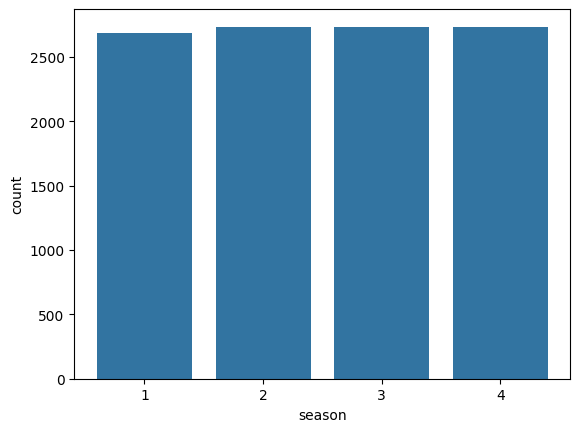

In [40]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of season in the dataset
sns.countplot(data = df, x = 'season')
plt.plot()   # displaying the plot

[]

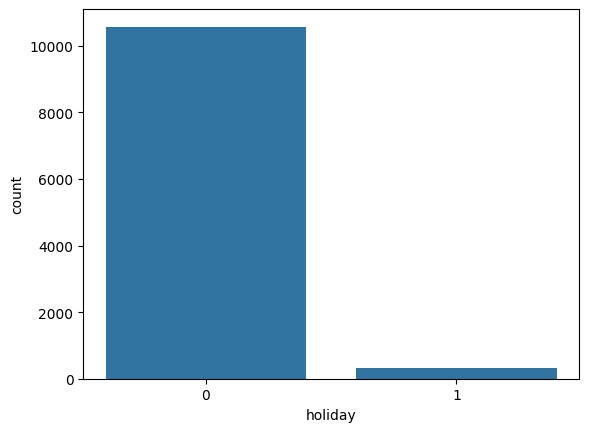

In [41]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of holiday in the dataset

sns.countplot(data = df, x = 'holiday')
plt.plot()       # displaying the chart

[]

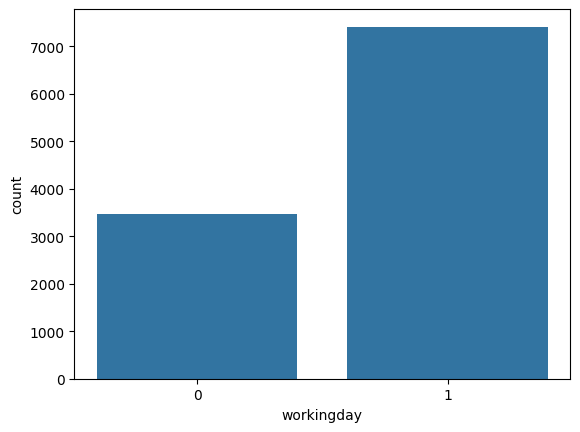

In [42]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of workingday in the dataset

sns.countplot(data = df, x = 'workingday')
plt.plot()      # displaying the chart

[]

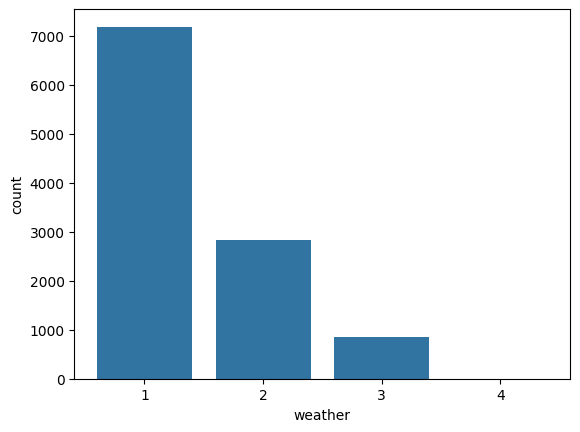

In [43]:
# The below code generates a visually appealing count plot to showcase the
    # distribution of weather in the dataset

sns.countplot(data = df, x = 'weather')
plt.plot()        # displaying the chart

[]

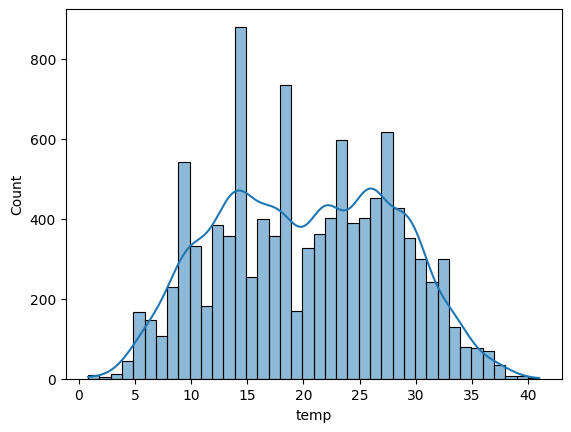

In [44]:
# The below code generates a histogram plot for the 'temp' feature, showing the distribution of
    # temperature values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'temp', kde = True, bins = 40)
plt.plot()        # displaying the chart

In [45]:
temp_mean = np.round(df['temp'].mean(), 2)
temp_std = np.round(df['temp'].std(), 2)
temp_mean, temp_std

(20.23, 7.79)

 - The mean and the standard deviation of the temp column is 20.23 and 7.79 degree celcius respectively.

[]

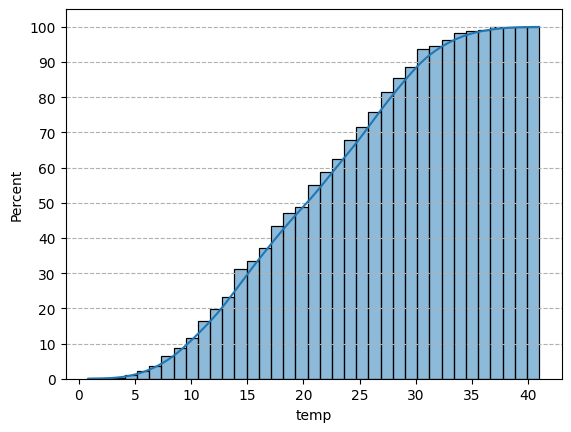

In [4]:
# The below code generates a histogram plot for the 'temp' feature, showing the cumulative
    # distribution of temperature values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'temp', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()          # displaying the chart

 - More than 80 % of the time, the temperature is less than 28 degrees celcius.


[]

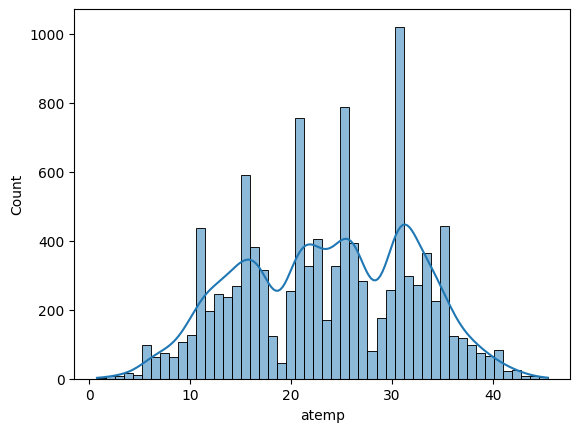

In [5]:
# The below code generates a histogram plot for the 'atemp' feature, showing the distribution of
    # feeling temperature values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'atemp', kde = True, bins = 50)
plt.plot()         # displaying the chart

In [6]:
temp_mean = np.round(df['atemp'].mean(), 2)
temp_std = np.round(df['atemp'].std(), 2)
temp_mean, temp_std

(23.66, 8.47)

 - The mean and the standard deviation of the atemp column is 23.66 and 8.47 degree celcius respectively.

[]

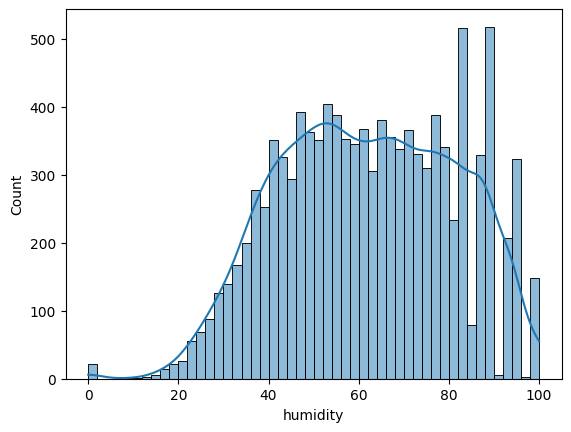

In [7]:
# The below code generates a histogram plot for the 'humidity' feature, showing the distribution of
    # humidity values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'humidity', kde = True, bins = 50)
plt.plot()       # displaying the chart

In [8]:
humidity_mean = np.round(df['humidity'].mean(), 2)
humidity_std = np.round(df['humidity'].std(), 2)
humidity_mean, humidity_std

(61.89, 19.25)

 - The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively.

[]

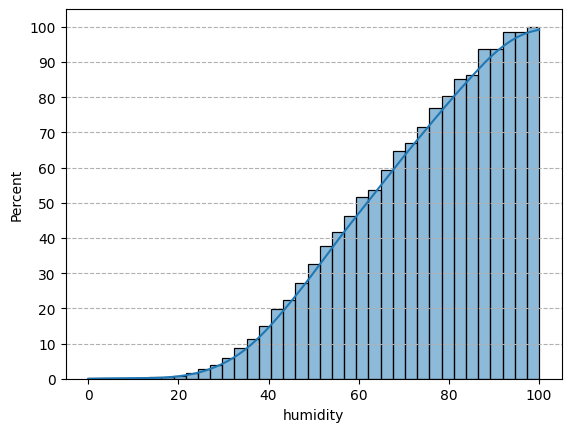

In [10]:
# The below code generates a histogram plot for the 'humidity' feature, showing the cumulative
    # distribution of humidity values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'humidity', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')    # setting the gridlines along y axis
plt.yticks(np.arange(0, 101, 10))
plt.plot()       # displaying the chart

 - More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.

[]

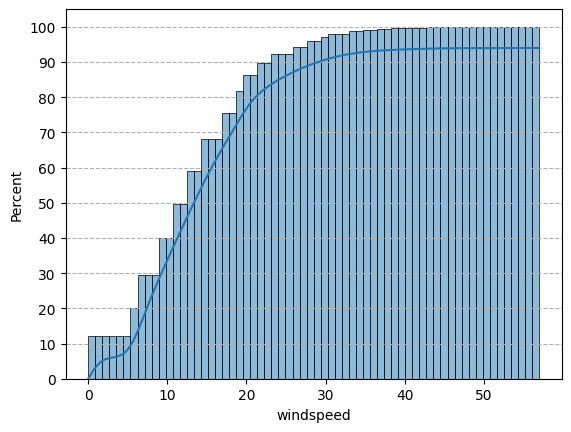

In [11]:
sns.histplot(data = df, x = 'windspeed', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()       # displaying the chart

 - More than 85 % of the total windspeed data has a value of less than 20.

In [12]:
len(df[df['windspeed'] < 20]) / len(df)

0.8626676465184641

[]

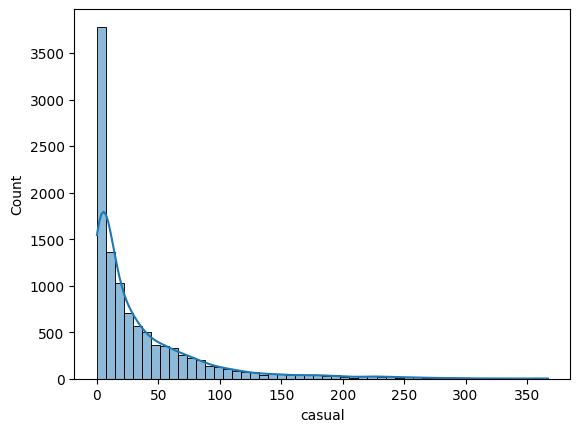

In [13]:
# The below code generates a histogram plot for the 'casual' feature, showing the distribution of
    # casual users' values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'casual', kde = True, bins = 50)
plt.plot()      # displaying the chart

[]

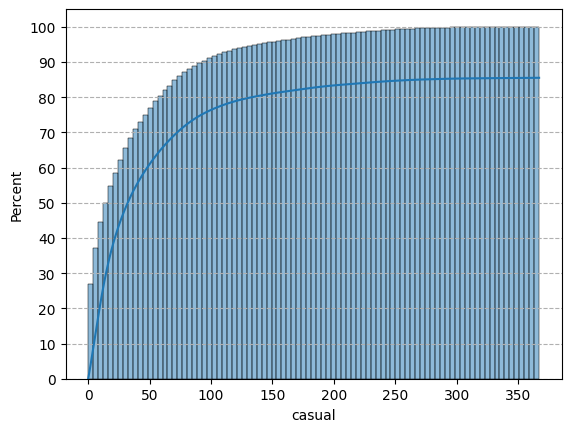

In [14]:
sns.histplot(data = df, x = 'casual', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()        # displaying the chart

 - More than 80 % of the time, the count of casual users is less than 60.

[]

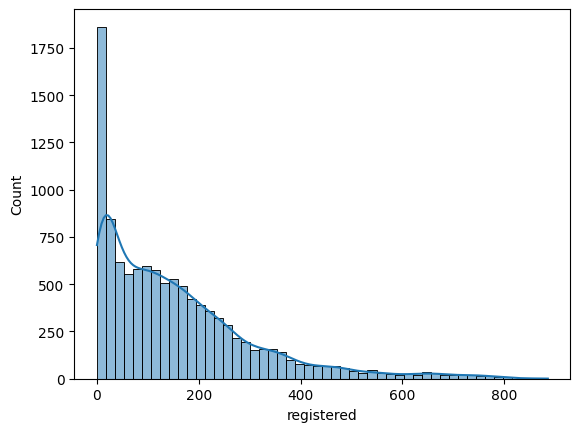

In [15]:
# The below code generates a histogram plot for the 'registered' feature, showing the distribution of
    # registered users' values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

sns.histplot(data = df, x = 'registered', kde = True, bins = 50)
plt.plot()          # displaying the chart

[]

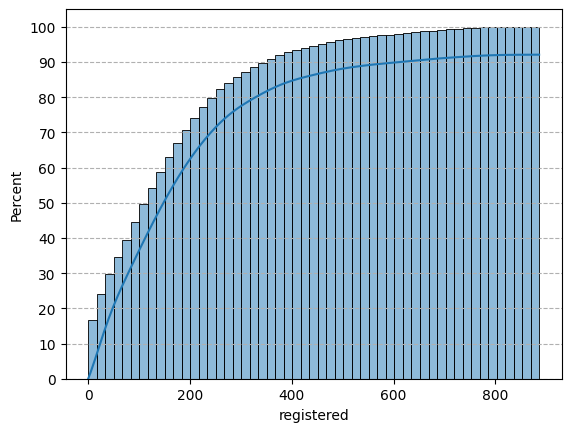

In [16]:
sns.histplot(data = df, x = 'registered', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()        # displaying the chart

 - More than 85 % of the time, the count of registered users is less than 300.

##**Outliers Detection**

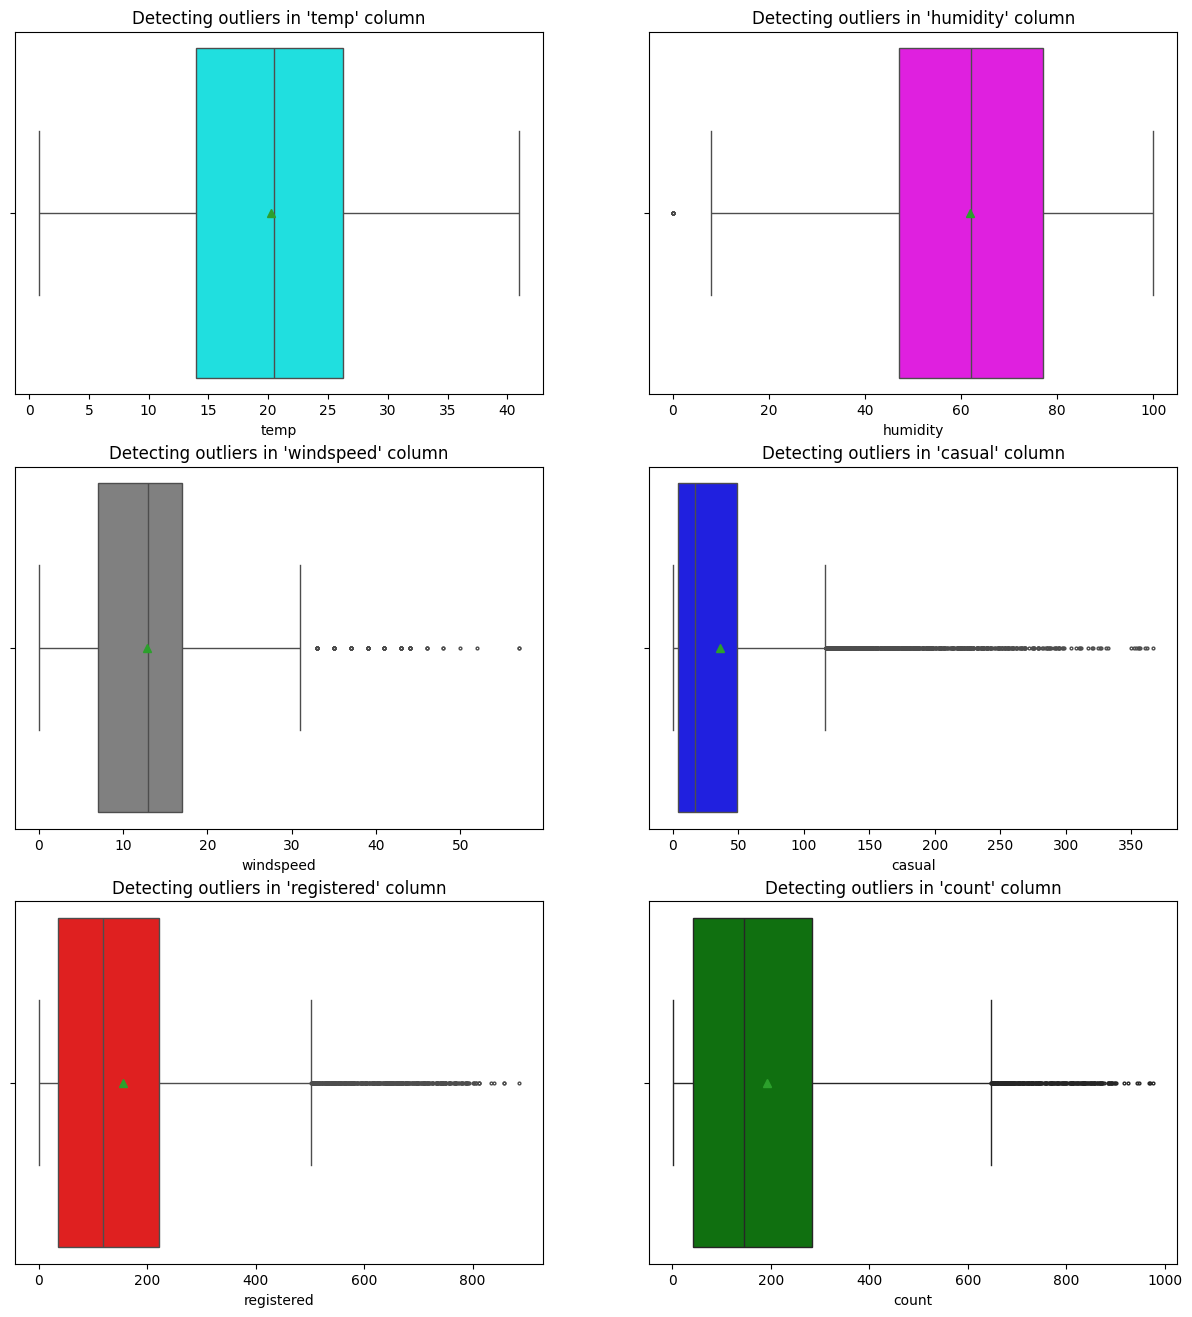

In [17]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = np.random.permutation(['red', 'blue', 'green', 'magenta', 'cyan', 'gray'])
count = 1
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i], color = colors[count - 1], showmeans = True, fliersize = 2)
    plt.plot()
    count += 1

 - There is no outlier in the temp column.
 - There are few outliers present in humidity column.
 - There are many outliers present in each of the columns : windspeed, casual, registered, count.

###**Bivariate Analysis**

[]

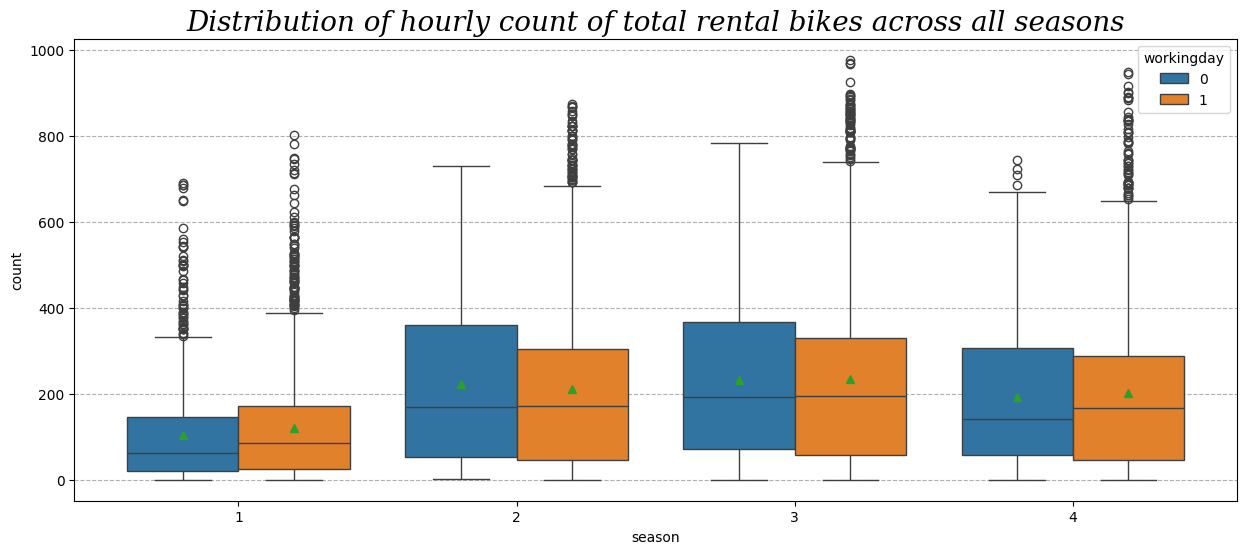

In [18]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

 - The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

[]

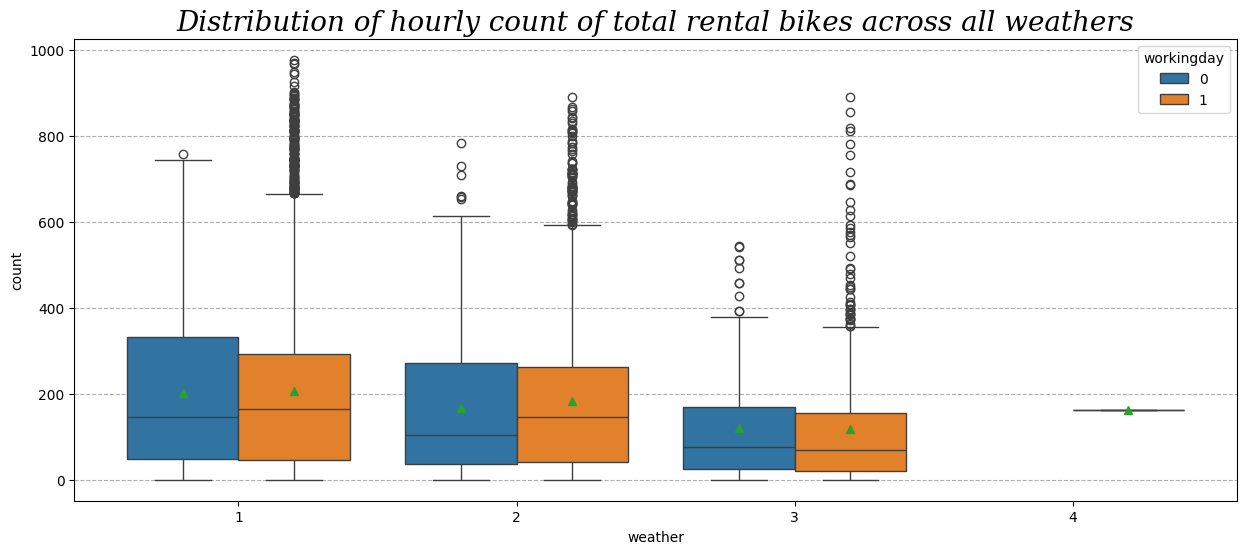

In [19]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

 - The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

**Checking effect of Working Day on the number of electric cycles rented**

In [20]:
df.groupby(by = 'workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


[]

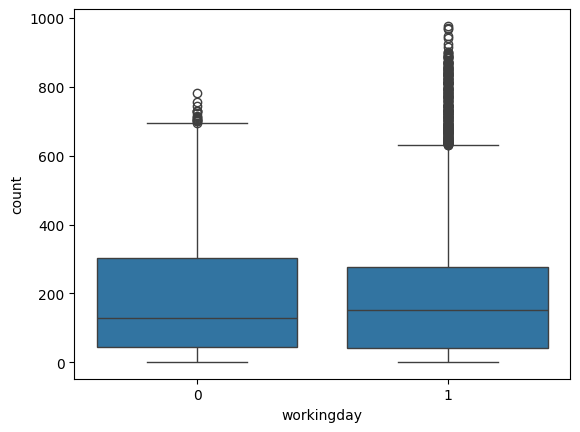

In [21]:
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.plot()

**Hypothesis Testing**

***STEP-1*** : Set up Null Hypothesis

---



  * **Null Hypothesis ( H0 )** - Working Day does not have any effect on the number of electric cycles rented.

  * **Alternate Hypothesis ( HA )** - Working Day has some effect on the number of electric cycles rented

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
* Distribution check using **QQ Plot**
* Homogeneity of Variances using **Levene's test**

***STEP-3***: Define Test statistics; Distribution of T under H0.

---
* If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.


***STEP-4***: Compute the p-value and fix value of alpha.

---
* We set our ***alpha to be 0.05***

***STEP-5***: Compare p-value and alpha.

---

* Based on p-value, we will accept or reject H0.


  1.   **p-val > alpha** : Accept H0
  2.   **p-val < alpha** : Reject H0

***Visual Tests to know if the samples follow normal distribution***

[]

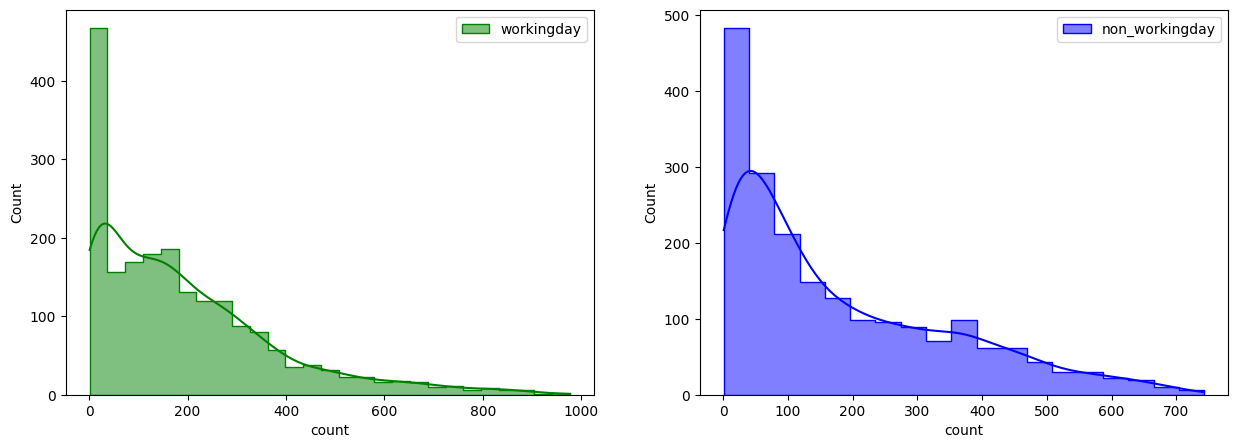

In [22]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(2000),
             element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(2000),
             element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.plot()

 - It can be inferred from the above plot that the distributions do not follow normal distribution.

***Distribution check using QQ Plot***

[]

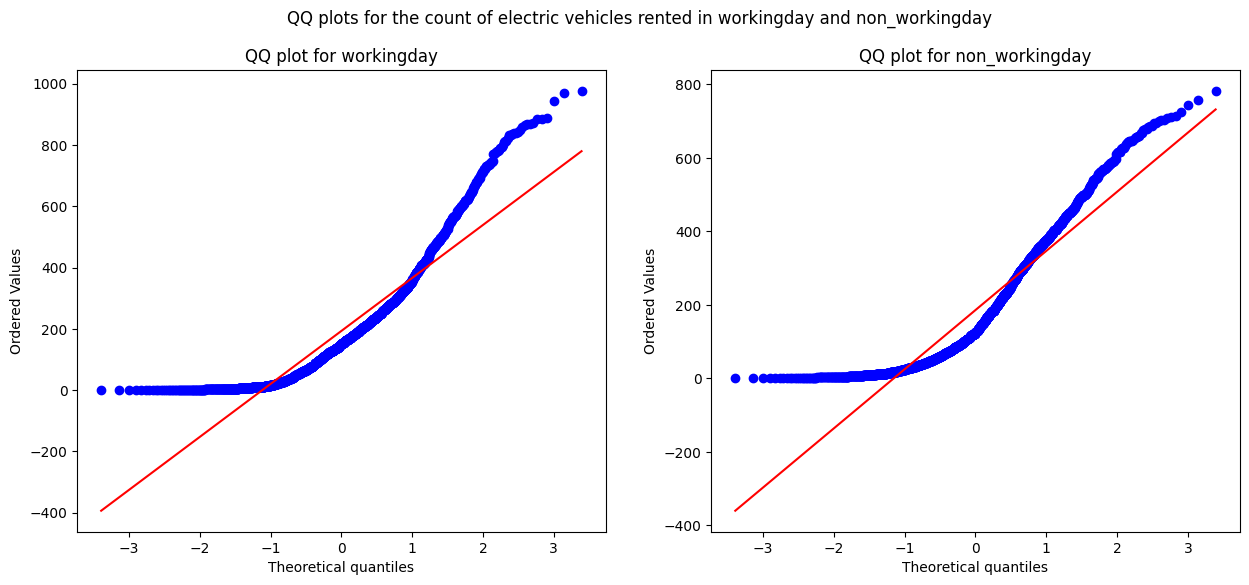

In [23]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in workingday and non_workingday')
spy.probplot(df.loc[df['workingday'] == 1, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for workingday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['workingday'] == 0, 'count'].sample(2000), plot = plt, dist = 'norm')
plt.title('QQ plot for non_workingday')
plt.plot()

 - It can be inferred from the above plot that the distributions do not follow normal distribution.
 - It can be seen from the above plots that the samples do not come from normal distribution.
  - Applying Shapiro-Wilk test for normality

$H_0$ : The sample **follows normal distribution**

$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [24]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 1, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.8209779656903888e-38
The sample does not follow normal distribution


In [25]:
test_stat, p_value = spy.shapiro(df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.0935902178554507e-35
The sample does not follow normal distribution


***Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.***

In [26]:
transformed_workingday = spy.boxcox(df.loc[df['workingday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.6132153862898905e-33
The sample does not follow normal distribution


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [27]:
transformed_non_workingday = spy.boxcox(df.loc[df['workingday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_non_workingday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.6132153862898905e-33
The sample does not follow normal distribution


 - Even after applying the boxcox transformation on each of the "workingday" and "non_workingday" data, the samples do not follow normal distribution.

* Homogeneity of Variances using **Lavene's test**

In [28]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df.loc[df['workingday'] == 1, 'count'].sample(2000),
                                df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.5664489896100234
The samples have Homogenous Variance 


##### Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [29]:
# Ho : Mean no.of electric cycles rented is same for working and non-working days
# Ha : Mean no.of electric cycles rented is not same for working and non-working days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = spy.mannwhitneyu(df.loc[df['workingday'] == 1, 'count'],
                                      df.loc[df['workingday'] == 0, 'count'])
print('P-value :',p_value)
if p_value < 0.05:
    print('Mean no.of electric cycles rented is not same for working and non-working days')
else:
    print('Mean no.of electric cycles rented is same for working and non-working days')

P-value : 0.9679139953914079
Mean no.of electric cycles rented is same for working and non-working days


##### Therefore, the mean hourly count of the total rental bikes is statistically same for both working and non- working days .

### Checking effect of holidays on the number of electric cycles rented.

In [30]:
df.groupby(by = 'holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


[]

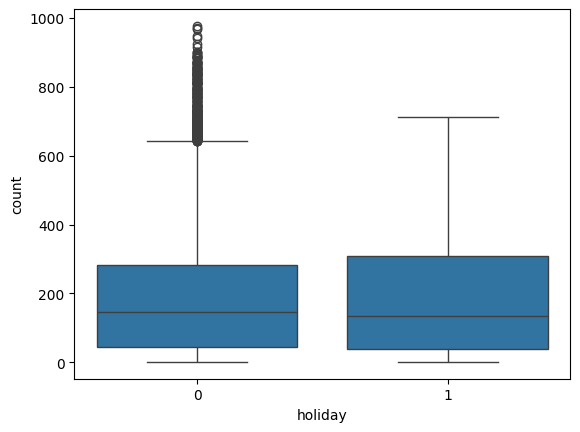

In [31]:
sns.boxplot(data = df, x = 'holiday', y = 'count')
plt.plot()

***STEP-1*** : Set up Null Hypothesis

---



  * **Null Hypothesis ( H0 )** - Holidays have no effect on the number of electric vehicles rented

  * **Alternate Hypothesis ( HA )** - Holidays has some effect on the number of electric vehicles rented

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
* Distribution check using **QQ Plot**
* Homogeneity of Variances using **Levene's test**

***STEP-3***: Define Test statistics; Distribution of T under H0.

---
* If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.


***STEP-4***: Compute the p-value and fix value of alpha.

---
* We set our ***alpha to be 0.05***

***STEP-5***: Compare p-value and alpha.

---

* Based on p-value, we will accept or reject H0.


  1.   **p-val > alpha** : Accept H0
  2.   **p-val < alpha** : Reject H0

***Visual Tests to know if the samples follow normal distribution***

[]

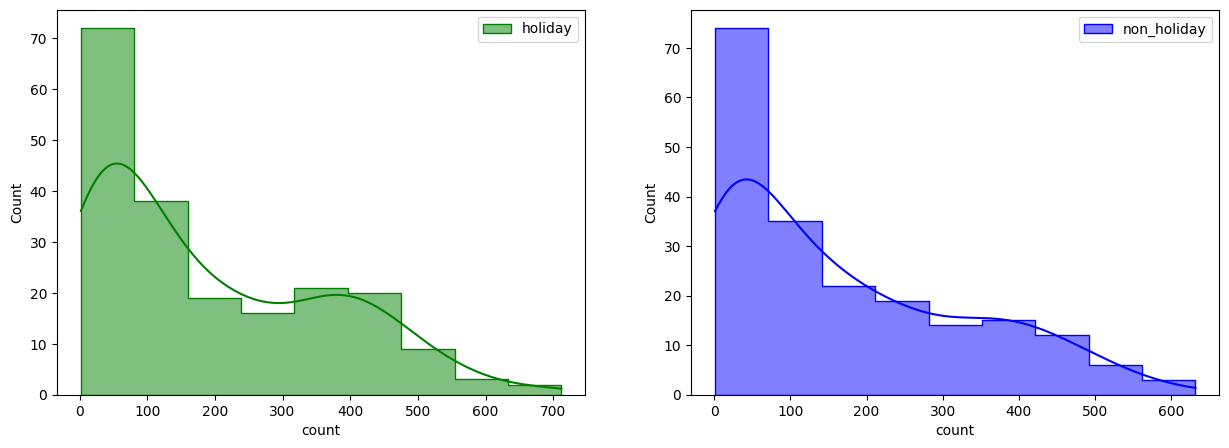

In [32]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['holiday'] == 1, 'count'].sample(200),
             element = 'step', color = 'green', kde = True, label = 'holiday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['holiday'] == 0, 'count'].sample(200),
             element = 'step', color = 'blue', kde = True, label = 'non_holiday')
plt.legend()
plt.plot()

 - It can be inferred from the above plot that the distributions do not follow normal distribution.

***Distribution check using QQ Plot***

[]

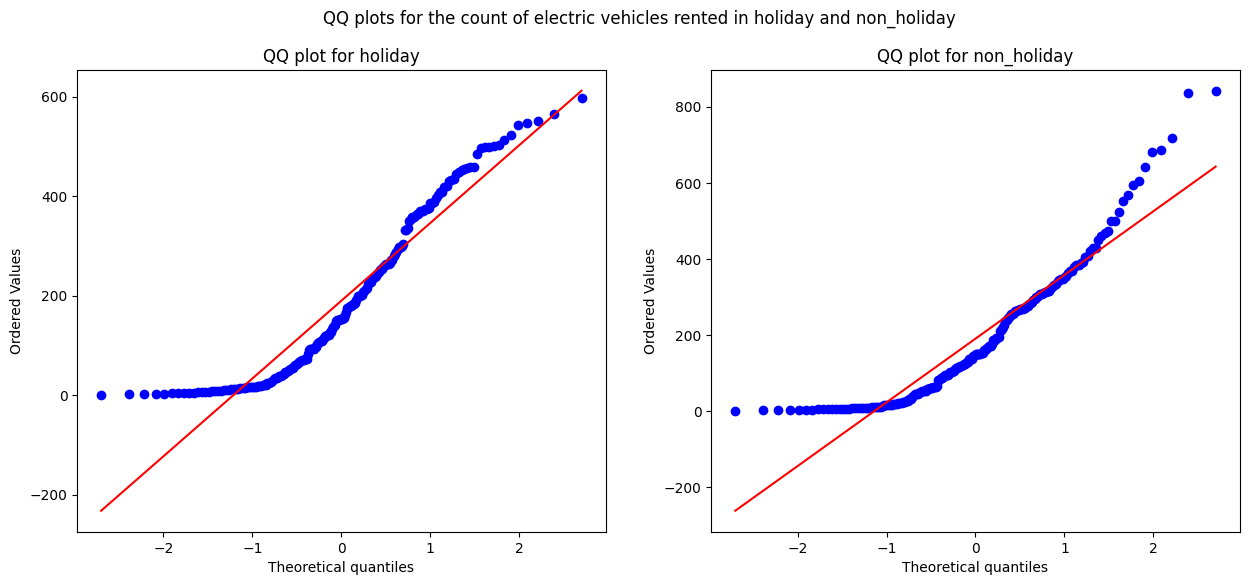

In [33]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in holiday and non_holiday')
spy.probplot(df.loc[df['holiday'] == 1, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for holiday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['holiday'] == 0, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for non_holiday')
plt.plot()

 - It can be inferred from the above plot that the distributions do not follow normal distribution.

###### It can be seen from the above plots that the samples do not come from normal distribution.

 - Applying Shapiro-Wilk test for normality



 $H_0$ : The sample **follows normal distribution**

$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [34]:
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.944287754359848e-11
The sample does not follow normal distribution


In [35]:
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 0, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.045474206679998e-11
The sample does not follow normal distribution


***Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.***

In [36]:
transformed_holiday = spy.boxcox(df.loc[df['holiday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.1349286782879062e-07
The sample does not follow normal distribution


In [37]:
transformed_non_holiday = spy.boxcox(df.loc[df['holiday'] == 0, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_non_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.7324654938938782e-27
The sample does not follow normal distribution


 - Even after applying the boxcox transformation on each of the "holiday" and "non_holiday" data, the samples do not follow normal distribution.

***Homogeneity of Variances using Levene's test***

In [38]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.9606884166476096
The samples have Homogenous Variance 


##### Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [39]:
# Ho : No.of electric cycles rented is similar for holidays and non-holidays
# Ha : No.of electric cycles rented is not similar for holidays and non-holidays days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = spy.mannwhitneyu(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                      df.loc[df['holiday'] == 1, 'count'].sample(200))
print('P-value :',p_value)
if p_value < 0.05:
    print('No.of electric cycles rented is not similar for holidays and non-holidays days')
else:
    print('No.of electric cycles rented is similar for holidays and non-holidays')

P-value : 0.5992582926426411
No.of electric cycles rented is similar for holidays and non-holidays


##### Therefore, the number of electric cycles rented is statistically similar for both holidays and non - holidays.

### Checking is  weather  dependent on the season ?

In [67]:
df[['weather', 'season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,4
freq,7192,2734


 - It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.

***STEP-1*** : Set up Null Hypothesis

---
1. **Null Hypothesis ( H0 )** - weather is independent of season

2. **Alternate Hypothesis ( HA )** - weather is dependent of seasons.

***STEP-2***: Define Test statistics

---
Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow **Chi-Square Distribution**.

***STEP-3***: Checking for basic assumptons for the hypothesis (Non-Parametric Test)

---
1. The data in the cells should be **frequencies**, or **counts** of cases.
2. The levels (or categories) of the variables are **mutually** **exclusive**. That is, a particular subject fits into one and only one level of each of the variables.
3. There are 2 variables, and both are measured as **categories**.
4. The **value of the cell expecteds should be 5 or more** in at least 80% of the cells, and no cell should have an expected of less than one (3).



***STEP-4***: Compute the p-value and fix value of alpha.

---
we will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our **alpha to be 0.05**

***STEP-5***: Compare p-value and alpha.

---

Based on p-value, we will accept or reject H0.

1. **p-val > alpha** : Accept H0
2. **p-val < alpha** : Reject H0

The **Chi-square statistic is a non-parametric** (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups or homoscedasticity in the data.

In [69]:
# First, finding the contingency table such that each value is the total number of total bikes rented
  # for a particular season and weather
cross_table = pd.crosstab(index = df['season'],
                          columns = df['weather'],
                          values = df['count'],
                          aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather,1,2,3,4
season,,,,
1,223009,76406,12919,164
2,426350,134177,27755,0
3,470116,139386,31160,0
4,356588,157191,30255,0


Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [70]:
cross_table = pd.crosstab(index = df['season'],
                          columns = df.loc[df['weather'] != 4, 'weather'],
                          values = df['count'],
                          aggfunc = np.sum).to_numpy()[:, :3]
cross_table

array([[223009,  76406,  12919],
       [426350, 134177,  27755],
       [470116, 139386,  31160],
       [356588, 157191,  30255]])

In [71]:
chi_test_stat, p_value, dof, expected = spy.chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [453484.88557396 155812.72247031  31364.39195574]
 [385087.91880639 132312.23118651  26633.8500071 ]]


In [73]:
alpha=0.05

In [74]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


##### Therefore, there is statistically significant dependency of weather and season based on the number of number of bikes rented.

### Checking is the number of cycles rented is similar or different in different weather ?

In [75]:
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


[]

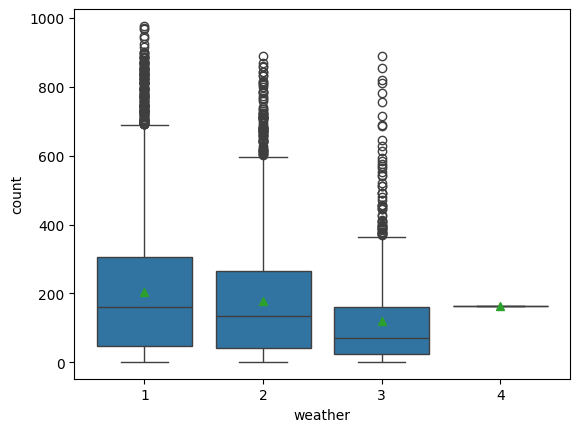

In [76]:
sns.boxplot(data = df, x = 'weather', y = 'count', showmeans = True)
plt.plot()

In [77]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

***STEP-1*** : Set up Null Hypothesis

---
* **Null Hypothesis ( H0 )** - Mean of cycle rented per hour is same for weather 1, 2 and 3.
(We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

* **Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
Normality check using **QQ Plot**. If the distribution is not normal, use **BOX-COX transform** to transform it to normal distribution.

Homogeneity of Variances using **Levene's test**

Each observations are **independent**.

***STEP-3***: Define **Test statistics**

---
The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

**F=MSB / MSW**

Under H0, the test statistic should follow **F-Distribution**.

***STEP-4***: Decide the kind of test.

---
We will be performing **right tailed f-test**

***STEP-5***: Compute the **p-value** and fix value of alpha.

---
we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our **alpha to be 0.05**

***STEP-6***: Compare p-value and alpha.

---
Based on p-value, we will accept or reject H0.
* **p-val > alpha** : Accept H0
* **p-val < alpha** : Reject H0

***Visual Tests to know if the samples follow normal distribution***

[]

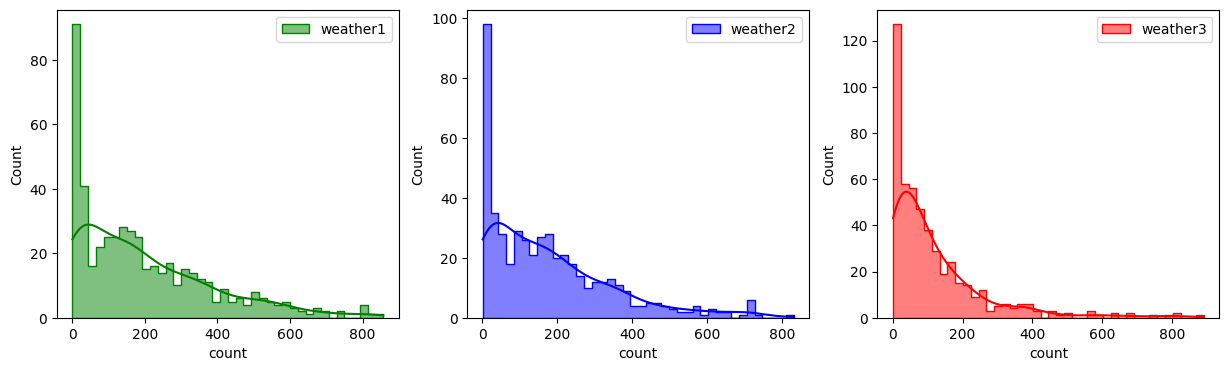

In [79]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()
plt.plot()

 - It can be inferred from the above plot that the distributions do not follow normal distribution.

***Distribution check using QQ Plot***

[]

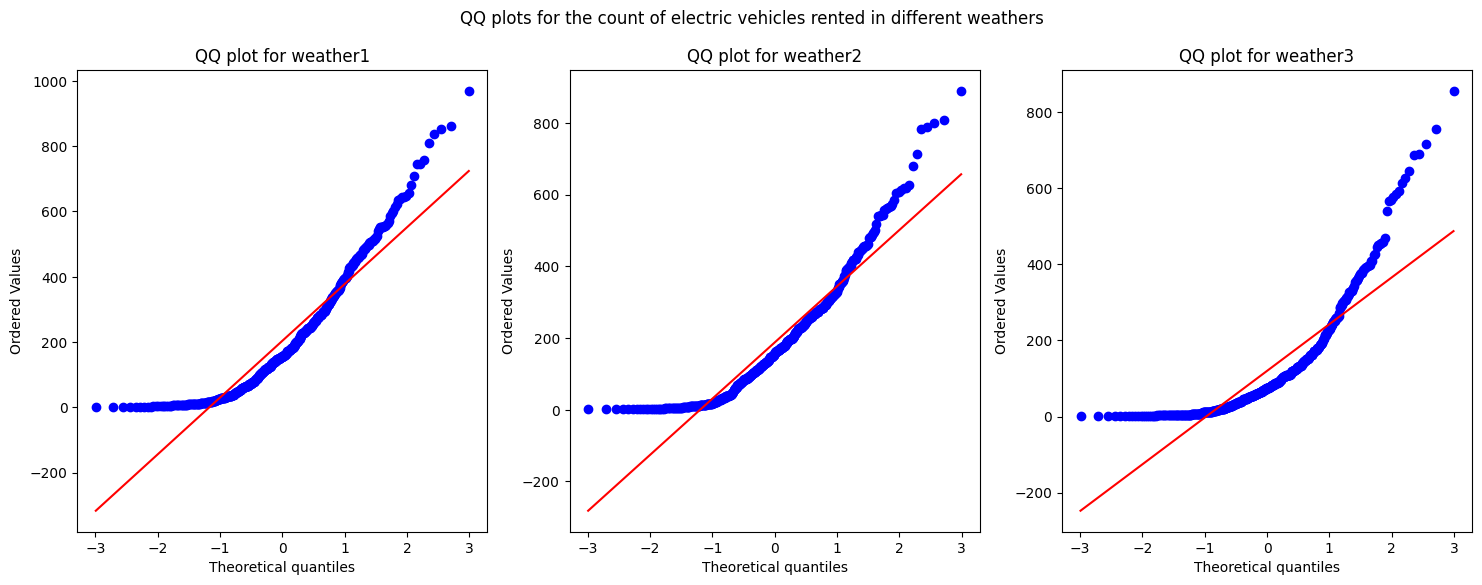

In [80]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')
plt.plot()

 - It can be inferred from the above plot that the distributions do not follow normal distribution.

###### It can be seen from the above plots that the samples do not come from normal distribution.

 - Applying Shapiro-Wilk test for normality

$H_0$ : The sample **follows normal distribution**

$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [81]:
test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.9300631702479396e-17
The sample does not follow normal distribution


In [82]:
test_stat, p_value = spy.shapiro(df_weather2.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.5987268665633287e-19
The sample does not follow normal distribution


In [83]:
test_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.689409623895353e-27
The sample does not follow normal distribution


***Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.***

In [84]:
transformed_weather1 = spy.boxcox(df_weather1.loc[:, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_weather1)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 8.194484283012727e-28
The sample does not follow normal distribution


In [85]:
transformed_weather2 = spy.boxcox(df_weather2.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather2)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.9219748327822736e-19
The sample does not follow normal distribution


In [86]:
transformed_weather3 = spy.boxcox(df_weather3.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather3)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.4137293646854232e-06
The sample does not follow normal distribution


 - Even after applying the boxcox transformation on each of the weather data, the samples do not follow normal distribution.

***Homogeneity of Variances using Levene's test***

In [95]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 6.5640323869135e-13
The samples do not have  Homogenous Variance


##### Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [ ]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_weather_1, df_weather_2, df_weather_3)


In [96]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


##### Therefore, the average number of rental bikes is statistically different for different weathers.

### Is the number of cycles rented is similar or different in different season ?

In [97]:
df.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [98]:
df_season_spring = df.loc[df['season'] == 'spring', 'count']
df_season_summer = df.loc[df['season'] == 'summer', 'count']
df_season_fall = df.loc[df['season'] == 'fall', 'count']
df_season_winter = df.loc[df['season'] == 'winter', 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

[]

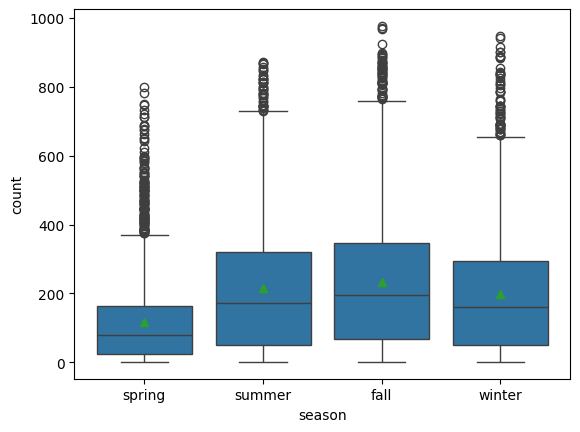

In [99]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.plot()

***STEP-1*** : Set up Null Hypothesis

---
* **Null Hypothesis ( H0 )** - Mean of cycle rented per hour is same for season 1,2,3 and 4.

* **Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is different for season 1,2,3 and 4.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
1. **Normality check** using QQ Plot. If the distribution is not normal, use **BOX-COX transform** to transform it to normal distribution.

2. Homogeneity of Variances using **Levene's test**
3. Each observations are **independent**.

***STEP-3***: Define Test statistics

---
The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

**F=MSB/MSW**

Under H0, the test statistic should follow **F-Distribution**.

***STEP-4***: Decide the kind of test.

---
We will be performing **right tailed f-test**

***STEP-5***: Compute the p-value and fix value of alpha.

---

we will be computing the anova-test p-value using the **f_oneway** function using scipy.stats.
We set our alpha to be **0.05**

***STEP-6***: Compare p-value and alpha.

---
Based on p-value, we will accept or reject H0.
p-val > alpha : Accept H0
p-val < alpha : Reject H0

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other.

Specifically, it tests the null hypothesis (H0):

***µ1 = µ2 = µ3 = ..... = µk***


where, µ = group mean and k = number of groups.

If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other.

***Visual Tests to know if the samples follow normal distribution***

[]

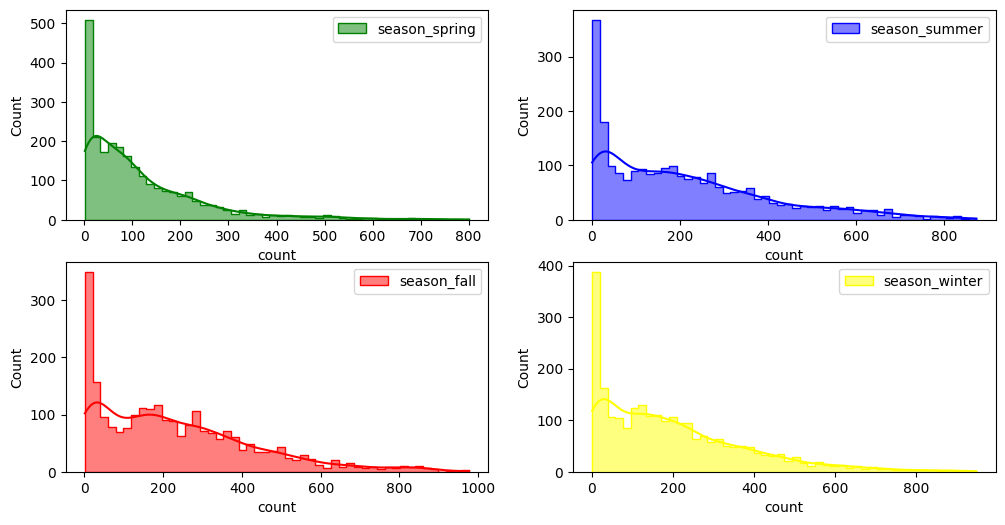

In [100]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500), bins = 50,
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.plot()

 - It can be inferred from the above plot that the distributions do not follow normal distribution.

***Distribution check using QQ Plot***

[]

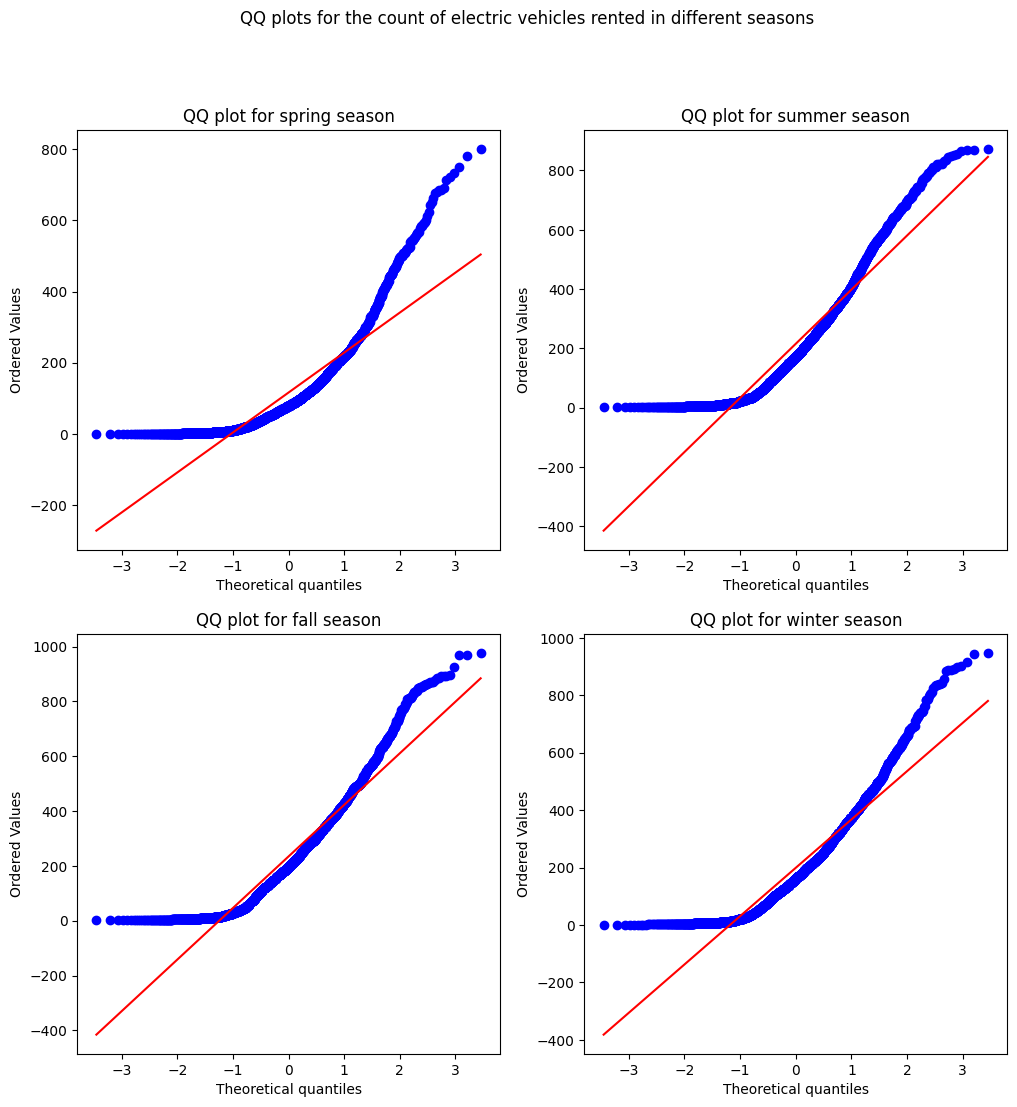

In [101]:
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
spy.probplot(df_season_spring.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
spy.probplot(df_season_summer.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
spy.probplot(df_season_fall.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
spy.probplot(df_season_winter.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.plot()

 - It can be inferred from the above plots that the distributions do not follow normal distribution.

###### It can be seen from the above plots that the samples do not come from normal distribution.

 - Applying Shapiro-Wilk test for normality

$H_0$ : The sample **follows normal distribution**

$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [102]:
test_stat, p_value = spy.shapiro(df_season_spring.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [103]:
test_stat, p_value = spy.shapiro(df_season_summer.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.73932209276002e-38
The sample does not follow normal distribution


In [104]:
test_stat, p_value = spy.shapiro(df_season_fall.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.7275707541171518e-35
The sample does not follow normal distribution


In [105]:
test_stat, p_value = spy.shapiro(df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.199616603289122e-38
The sample does not follow normal distribution


***Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.***

In [106]:
transformed_df_season_spring = spy.boxcox(df_season_spring.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_spring)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.426741504811926e-17
The sample does not follow normal distribution


In [107]:
transformed_df_season_summer = spy.boxcox(df_season_summer.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_summer)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.034811736829642e-21
The sample does not follow normal distribution


In [108]:
transformed_df_season_fall = spy.boxcox(df_season_fall.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_fall)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.218691433795243e-21
The sample does not follow normal distribution


In [109]:
transformed_df_season_winter = spy.boxcox(df_season_winter.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_winter)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.7089148204796932e-19
The sample does not follow normal distribution


 - Even after applying the boxcox transformation on each of the season data, the samples do not follow normal distribution.

***Homogeneity of Variances using Levene's test***

In [110]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.2427227180447257e-108
The samples do not have  Homogenous Variance


##### Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [111]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151


In [112]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


##### Therefore, the average number of rental bikes is statistically different for different seasons.

[]

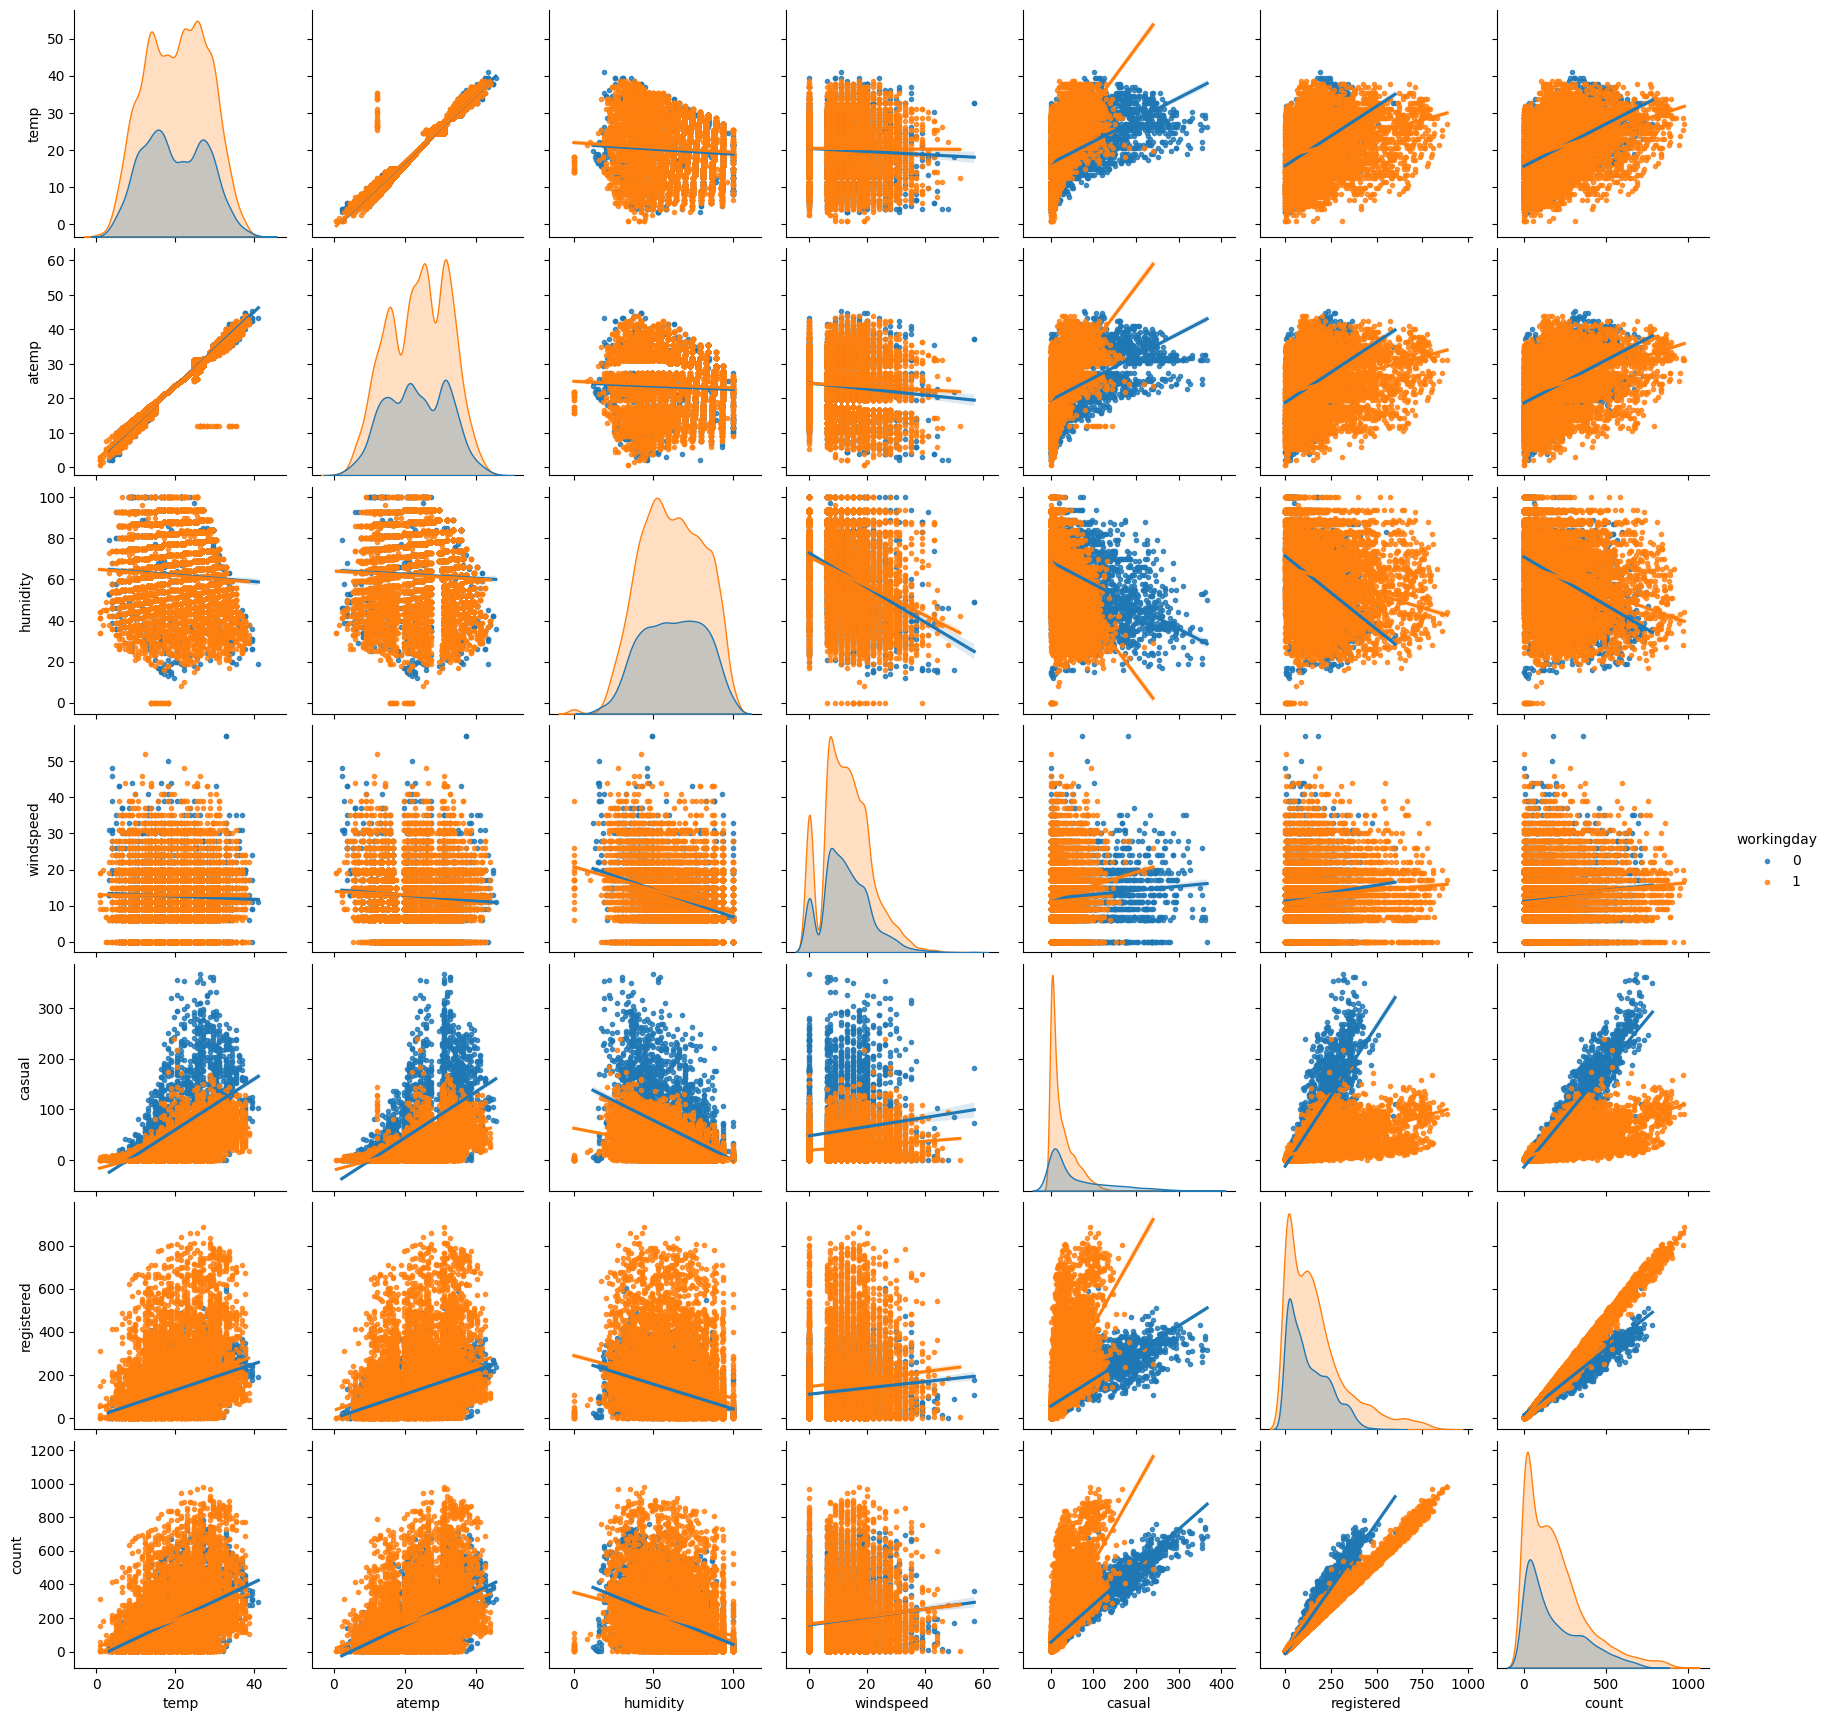

In [113]:
sns.pairplot(data = df,
             kind = 'reg',
             hue = 'workingday',
             markers = '.')
plt.plot()

In [116]:
# Exclude 'season' column from correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation
corr_data = numeric_df.corr()


[]

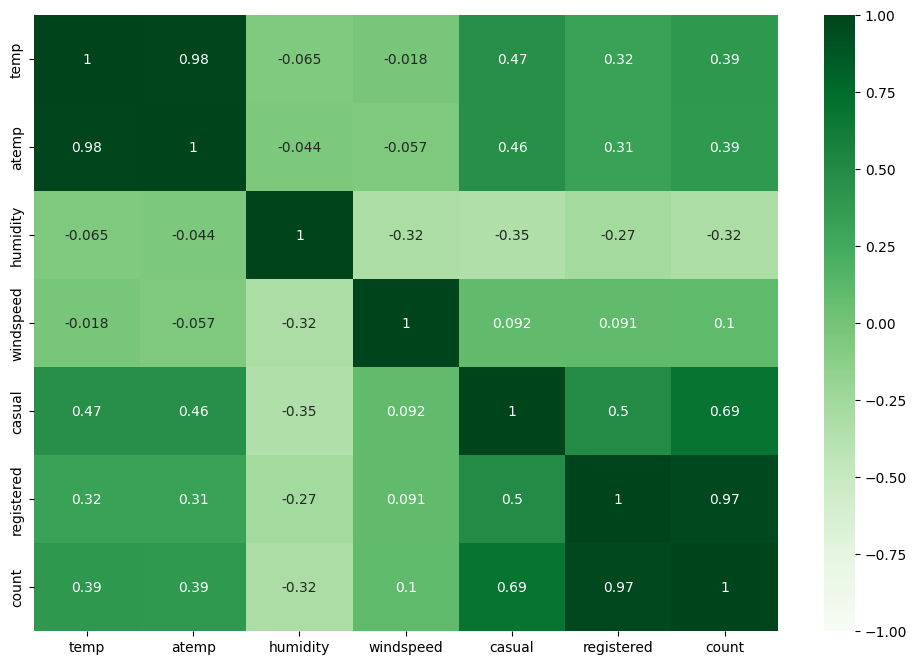

In [117]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = corr_data, cmap = 'Greens', annot = True, vmin = -1, vmax = 1)
plt.plot()

 - Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]
 - High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.
 - Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
 - Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]
 - Negligible correlation exists between all other combinations of columns.

### Insights


- Data spans from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'), totaling 718 days and 23 hours.

- Among every 100 users, approximately 19 are occasional users while 81 are registered users.

- The average total hourly rental count for bikes is 144 in 2011 and 239 in 2012, indicating a yearly growth rate of 65.41%.

- A seasonal trend is observed in bike rental counts, with peak demand during spring and summer, a slight dip in fall, and a further decline in winter.

- The lowest average hourly rental counts occur in January, followed by February and March.

- Throughout the day, there are distinct fluctuations in counts, with lows in the early morning, peaks in the afternoon, and gradual declines in the evening and night.

- Over 80% of the time, temperatures are below 28 degrees Celsius.

- Humidity levels exceed 40% for over 80% of the time, ranging from optimal to too moist.

- Windspeed data shows values under 20 for over 85% of the total.

- Bike rental counts are highest during clear and cloudy weather, followed by misty conditions and rain, with few records for extreme weather.

- Mean hourly rental counts are statistically similar on both working and non-working days.

- Weather and season show statistically significant dependence on hourly bike rental counts.

- Hourly bike rental counts significantly vary across different weather conditions.

- There's no significant statistical dependency between weather types 1, 2, 3, and season based on average hourly bike rental counts.

- Hourly bike rental counts vary significantly across different seasons.

### Recommendations

- **Seasonal Marketing Strategy:** Given the noticeable seasonal trends in bike rental counts, Yulu can tailor its marketing efforts accordingly. Focus on promoting bike rentals during the peak seasons of spring and summer, offering seasonal incentives or tailored packages to attract more customers during these periods.

- **Hourly Pricing Adjustments:** To capitalize on the hourly fluctuations in rental counts, Yulu could consider implementing dynamic pricing based on time of day. By offering lower rates during off-peak hours and slightly higher rates during peak times, the company can encourage rentals during quieter periods, effectively managing demand.

- **Weather-responsive Promotions:** Acknowledging the influence of weather on rental patterns, Yulu can develop weather-specific promotions. Emphasize promotions during clear and cloudy weather conditions, which typically see higher rental counts. Providing weather-tailored discounts can help attract more customers during these favorable conditions.

- **Targeted User Engagement:** With a significant portion of users being registered members, Yulu can tailor its engagement strategies accordingly. Offer personalized incentives, loyalty rewards, or exclusive deals to registered users, while ensuring seamless rental experiences and highlighting the benefits for casual users.

- **Inventory Optimization:** Analyzing demand variations across different months can inform inventory management strategies. Yulu can adjust bike inventory levels during lower demand months like January to March, ensuring optimal stock levels to meet demand fluctuations effectively.

- **Enhanced Weather Data Collection:** Recognizing the importance of comprehensive weather data, Yulu may consider enhancing its data collection methods, especially for extreme weather conditions. Improved data can inform operational decisions, such as offering specialized bike models or safety measures during adverse weather.

- **Customer Comfort Enhancements:** Considering prevalent humidity levels and moderate temperatures, Yulu can enhance customer comfort by providing amenities like umbrellas, hydration stations, or cooling towels. Such amenities contribute to a positive customer experience, fostering loyalty.

- **Partnerships with Weather Services:** Collaborating with weather services can provide real-time weather updates to potential customers, enhancing their biking experience. Integrating weather information into marketing campaigns or rental apps can attract users seeking ideal biking conditions.

- **Seasonal Maintenance Planning:** Allocating resources for seasonal bike maintenance ensures optimal fleet condition during peak seasons. Conducting regular maintenance checks throughout the year prevents breakdowns and enhances customer satisfaction.

- **Feedback-driven Improvements:** Encouraging customer feedback helps Yulu understand preferences and areas for improvement. Actively seeking and incorporating customer input can enhance service offerings and customer satisfaction levels.

- **Social Media Engagement:** Leveraging social media platforms, Yulu can showcase biking experiences, share customer testimonials, and engage with users through interactive content. Targeted advertising campaigns can reach specific customer segments, driving bookings and brand engagement.

- **Promotional Initiatives on Environmental Days:** Given Yulu's commitment to sustainability, offering special discounts on occasions like Zero Emissions Day, Earth Day, and World Environment Day can attract environmentally conscious users, aligning with the company's values.-